In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

In [8]:
data = yf.download("BZ=F", period="1y")

[*********************100%***********************]  1 of 1 completed


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,94.199997,94.949997,93.779999,94.430000,94.430000,33918
2023-09-19,94.629997,95.949997,94.169998,94.339996,94.339996,43614
2023-09-20,94.480003,94.730003,92.760002,93.529999,93.529999,43515
2023-09-21,93.220001,94.599998,92.199997,93.300003,93.300003,38711
2023-09-22,93.320000,94.629997,92.800003,93.269997,93.269997,31511


In [10]:
df = data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,94.199997,94.949997,93.779999,94.430000,94.430000,33918
2023-09-19,94.629997,95.949997,94.169998,94.339996,94.339996,43614
2023-09-20,94.480003,94.730003,92.760002,93.529999,93.529999,43515
2023-09-21,93.220001,94.599998,92.199997,93.300003,93.300003,38711
2023-09-22,93.320000,94.629997,92.800003,93.269997,93.269997,31511


In [12]:
df['logReturns'] = np.log(df.Close/df.Close.shift(1))

In [14]:
df['s1'] = df.Close.shift(1)

In [16]:
import matplotlib.pyplot as plt

In [19]:
df.logReturns.describe()

count    251.000000
mean      -0.001039
std        0.017981
min       -0.066232
25%       -0.010806
50%       -0.000686
75%        0.010729
max        0.055303
Name: logReturns, dtype: float64

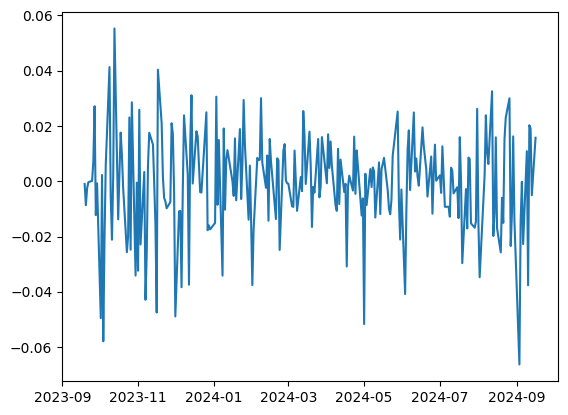

In [18]:
plt.plot(df.logReturns)

In [21]:
from statsmodels.tsa.stattools import adfuller, kpss

mySeries = df.logReturns
mySeries = mySeries.dropna()

# ADF test
adf_result = adfuller(mySeries)
print('ADF Test Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# KPSS test
kpss_result = kpss(mySeries)
print('KPSS Test Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])

ADF Test Statistic: -15.687876260794894
p-value: 1.4459156929119422e-28
Critical Values: {'1%': np.float64(-3.456780859712), '5%': np.float64(-2.8731715065600003), '10%': np.float64(-2.572968544)}
KPSS Test Statistic: 0.088040882091268
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\kywong\AppData\Local\Temp\ipykernel_7768\617058408.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(mySeries)


In [16]:
df['t-1'] = df['Adj Close'].shift(1)
df['t-2'] = df['Adj Close'].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,t-1,t-2
Date,,,,,,,,
2023-09-18,443.049988,444.970001,442.559998,443.630005,439.053619,55752200,NaN,NaN
2023-09-19,442.679993,443.290009,439.940002,442.709991,438.143097,66514600,439.053619,NaN
2023-09-20,444.010010,444.440002,438.429993,438.640015,434.115112,82562600,438.143097,439.053619
2023-09-21,435.700012,435.970001,431.230011,431.390015,426.939880,103976100,434.115112,438.143097
2023-09-22,432.450012,434.100006,429.989990,430.420013,425.979889,100829700,426.939880,434.115112


In [28]:
df['avgClose5'] = df.Close.rolling(5).mean()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,avgClose5
Date,,,,,,,
2023-09-18,443.049988,444.970001,442.559998,443.630005,439.053619,55752200,NaN
2023-09-19,442.679993,443.290009,439.940002,442.709991,438.143097,66514600,NaN
2023-09-20,444.010010,444.440002,438.429993,438.640015,434.115112,82562600,NaN
2023-09-21,435.700012,435.970001,431.230011,431.390015,426.939880,103976100,NaN
2023-09-22,432.450012,434.100006,429.989990,430.420013,425.979889,100829700,437.358008
2023-09-25,429.170013,432.269989,428.720001,432.230011,427.771210,70874500,435.078009
2023-09-26,429.089996,429.820007,425.019989,425.880005,421.486694,96168400,431.712012
2023-09-27,427.089996,427.670013,422.290009,426.049988,421.654968,104705800,429.194006
2023-09-28,425.480011,430.250000,424.869995,428.519989,424.099487,92258300,428.620001


In [31]:
expandedClose = df.Close.expanding(5)
expandedClose.max()

Date
2023-09-18           NaN
2023-09-19           NaN
2023-09-20           NaN
2023-09-21           NaN
2023-09-22    443.630005
                 ...    
2024-09-10    564.859985
2024-09-11    564.859985
2024-09-12    564.859985
2024-09-13    564.859985
2024-09-16    564.859985
Name: Close, Length: 251, dtype: float64

In [21]:
shiftTest = df.shift(2)
shiftTest.head()

,Open,High,Low,Close,Adj Close,Volume,t-1,t-2
Date,,,,,,,,
2023-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-20,443.049988,444.970001,442.559998,443.630005,439.053619,55752200.0,NaN,NaN
2023-09-21,442.679993,443.290009,439.940002,442.709991,438.143097,66514600.0,439.053619,NaN
2023-09-22,444.010010,444.440002,438.429993,438.640015,434.115112,82562600.0,438.143097,439.053619


In [37]:
rollTest = df.expanding()
rollTest

Expanding [min_periods=1,axis=0,method=single]

In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,443.049988,444.970001,442.559998,443.630005,439.053619,55752200
2023-09-19,442.679993,443.290009,439.940002,442.709991,438.143097,66514600
2023-09-20,444.010010,444.440002,438.429993,438.640015,434.115112,82562600
2023-09-21,435.700012,435.970001,431.230011,431.390015,426.939880,103976100
2023-09-22,432.450012,434.100006,429.989990,430.420013,425.979889,100829700


In [41]:
df.rolling(3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-20,443.246663,444.233337,440.309998,441.660004,437.103943,6.827647e+07
2023-09-21,440.796672,441.233337,436.533335,437.580007,433.066030,8.435110e+07
2023-09-22,437.386678,438.170003,433.216665,433.483348,429.011627,9.578947e+07
...,...,...,...,...,...,...
2024-09-10,547.650004,549.486674,541.833333,545.186646,545.186646,4.844473e+07
2024-09-11,547.236674,550.740011,542.006673,549.873311,549.873311,5.069633e+07
2024-09-12,550.690002,554.636678,545.360006,554.099996,554.099996,5.451197e+07


In [44]:
a = [10, 203]

b = a = sum(a)

b

213

In [25]:
newDF = pd.concat([rollTest.min(), rollTest.max(), rollTest.mean(), shiftTest], axis=1)
newDF.head()

,Open,High,Low,Close,Adj Close,Volume,t-1,t-2,Open,High,...,t-1,t-2,Open,High,Low,Close,Adj Close,Volume,t-1,t-2
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,443.049988,444.970001,442.559998,443.630005,439.053619,55752200.0,NaN,NaN
2023-09-21,442.679993,443.290009,439.940002,442.709991,438.143097,55752200.0,NaN,NaN,443.049988,444.970001,...,NaN,NaN,442.679993,443.290009,439.940002,442.709991,438.143097,66514600.0,439.053619,NaN
2023-09-22,442.679993,443.290009,438.429993,438.640015,434.115112,66514600.0,438.143097,NaN,444.010010,444.440002,...,438.598358,NaN,444.010010,444.440002,438.429993,438.640015,434.115112,82562600.0,438.143097,439.053619
